# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
dataset = pd.read_csv('week4.csv')

In [3]:
dataset

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend,14_Day_Rolling_Mean,Upper_Band,Lower_Band
0,AXISBANK,EQ,503.00,505.00,508.50,498.40,500.25,500.10,502.95,8806756,...,109965,4320438,49.06,5,2017,0.000000,Slight or No change,0.000,0.000000,0.000000
1,AXISBANK,EQ,500.10,502.10,504.50,493.50,502.05,501.50,499.85,8610492,...,101028,4027982,46.78,5,2017,0.279944,Slight or No change,0.000,0.000000,0.000000
2,AXISBANK,EQ,501.50,501.35,506.75,498.50,502.00,502.80,502.88,6443135,...,84189,2876528,44.64,5,2017,0.259222,Slight or No change,0.000,0.000000,0.000000
3,AXISBANK,EQ,502.80,498.00,499.10,490.25,492.85,492.00,494.96,9227022,...,95624,5348691,57.97,5,2017,-2.147971,Negative,0.000,0.000000,0.000000
4,AXISBANK,EQ,492.00,495.75,503.85,494.20,501.90,501.70,499.10,7611430,...,72985,4190505,55.06,5,2017,1.971545,Positive,0.000,0.000000,0.000000
5,AXISBANK,EQ,501.70,504.00,507.45,499.50,502.00,502.30,503.00,4970982,...,62027,2665857,53.63,5,2017,0.119593,Slight or No change,0.000,0.000000,0.000000
6,AXISBANK,EQ,502.30,502.25,506.10,495.20,500.50,500.60,500.17,7549551,...,69512,4120666,54.58,5,2017,-0.338443,Slight or No change,0.000,0.000000,0.000000
7,AXISBANK,EQ,500.60,503.00,505.00,495.00,499.65,499.30,498.39,7271148,...,61592,4986725,68.58,5,2017,-0.259688,Slight or No change,0.000,0.000000,0.000000
8,AXISBANK,EQ,499.30,502.00,509.90,495.85,507.85,507.45,504.39,9157557,...,106201,4220728,46.09,5,2017,1.632285,Positive,0.000,0.000000,0.000000
9,AXISBANK,EQ,507.45,508.00,513.00,505.00,510.50,511.45,508.86,5995136,...,72779,2824290,47.11,5,2017,0.788255,Slight positive,501.455,0.000000,0.000000


In [4]:
daily_mean = (dataset['Close Price'][:-1].values / dataset['Close Price'][1:] - 1).mean()

In [5]:
daily_std = (dataset['Close Price'][:-1].values / dataset['Close Price'][1:] - 1).std()

In [6]:
annual_mean = daily_mean * 252
print(annual_mean)

-0.1566372898348178


In [7]:
annual_stddev = daily_std * math.sqrt(252)
print(annual_stddev)

0.2757519158153919


### Query 5.2
5.2 Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [8]:
adani = pd.read_csv('ADANIPORTS.csv')
asian = pd.read_csv('ASIANPAINT.csv')
bajaj = pd.read_csv('BAJFINANCE.csv')
bpcl = pd.read_csv('BPCL.csv')
axis = pd.read_csv('AXISBANK.csv')

In [9]:
adani = adani.groupby('Series').get_group('EQ')
adani = adani.reset_index(drop = True)
asian = asian.groupby('Series').get_group('EQ')
asian = asian.reset_index(drop = True)
bajaj = bajaj.groupby('Series').get_group('EQ')
bajaj = bajaj.reset_index(drop = True)
bpcl = bpcl.groupby('Series').get_group('EQ')
bpcl = bpcl.reset_index(drop = True)
axis = axis.groupby('Series').get_group('EQ')
axis = axis.reset_index(drop = True)

In [10]:
closing = pd.DataFrame()

In [11]:
closing['ADANIPORTS'] = adani['Close Price']
closing['ASIANPAINT'] = asian['Close Price']
closing['BAJFINANCE'] = bajaj['Close Price']
closing['BPCL'] = bpcl['Close Price']
closing['AXISBANK'] = axis['Close Price']

In [12]:
closing

,ADANIPORTS,ASIANPAINT,BAJFINANCE,BPCL,AXISBANK
0,356.20,1148.05,1332.95,727.85,500.10
1,354.50,1142.85,1347.75,733.30,501.50
2,348.55,1154.95,1324.80,727.45,502.80
3,347.90,1151.35,1314.55,714.90,492.00
4,349.45,1123.15,1289.15,702.45,501.70
5,354.45,1112.55,1242.15,695.60,502.30
6,331.65,1098.90,1233.75,699.55,500.60
7,339.65,1091.20,1224.35,711.90,499.30
8,340.75,1113.20,1258.85,726.85,507.45
9,348.00,1132.45,1317.80,749.65,511.45


In [13]:
closing = closing.pct_change()
closing.fillna(0, inplace = True)

In [14]:
closing

,ADANIPORTS,ASIANPAINT,BAJFINANCE,BPCL,AXISBANK
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.004773,-0.004529,0.011103,0.007488,0.002799
2,-0.016784,0.010588,-0.017028,-0.007978,0.002592
3,-0.001865,-0.003117,-0.007737,-0.017252,-0.021480
4,0.004455,-0.024493,-0.019322,-0.017415,0.019715
5,0.014308,-0.009438,-0.036458,-0.009752,0.001196
6,-0.064325,-0.012269,-0.006762,0.005679,-0.003384
7,0.024122,-0.007007,-0.007619,0.017654,-0.002597
8,0.003239,0.020161,0.028178,0.021000,0.016323
9,0.021277,0.017292,0.046828,0.031368,0.007883


In [15]:
mean_daily_returns = closing.mean()
mean_daily_returns = mean_daily_returns.values.reshape(5,1)
cov_matrix = closing.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])

In [16]:
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
print(portfolio_return)

0.58


In [17]:
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print(portfolio_std_dev)

0.19


### Query 5.3
5.3 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [18]:
mean_daily_returns = closing.mean()
cov_matrix = closing.cov()
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

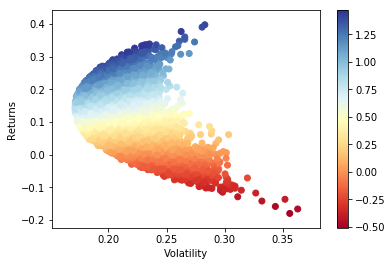

In [19]:
for i in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]    
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

### Query 5.4
5.4 Mark the 2 portfolios where -
<br>Portfolio 1 - The Sharpe ratio is the highest
<br>Portfolio 2 - The volatility is the lowest. 

In [20]:
stocks = ['ADANIPORTS', 'ASIANPAINT', 'BAJFINANCE', 'BPCL', 'AXISBANK']
mean_daily_returns = closing.mean()
cov_matrix = closing.cov()
num_portfolios = 25000
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [21]:
for i in range(num_portfolios):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]  
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

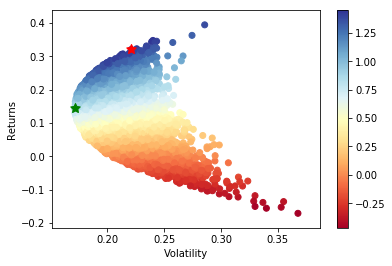

In [22]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=100)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=100)
plt.show()